In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')
words = stopwords.words("english")
stemmer = SnowballStemmer('english')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.svm import LinearSVC



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brucedecker/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brucedecker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
stopwords_set = set(stopwords.words("english"))
df_listing_detail = pd.read_csv('airbnb-open-data-in-nyc/listings_detail.csv', keep_default_na=False, skip_blank_lines=False, engine='python')
df_listing_detail = df_listing_detail.replace(np.nan, '', regex=True)




In [3]:
df_listing_detail.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,18461891,https://www.airbnb.com/rooms/18461891,20171002002103,2017-10-03,"Bright, comfortable 1B studio near everything!",*Looking to fill these specific dates: June 24...,Very well illuminated space includes comfortab...,*Looking to fill these specific dates: June 24...,none,There are Michelin-rated restaurants in the ar...,...,f,,,f,f,strict,f,f,1,
1,20702398,https://www.airbnb.com/rooms/20702398,20171002002103,2017-10-03,Quiet house on City Island,1 private bedroom and bathroom available for o...,,1 private bedroom and bathroom available for o...,none,This neighborhood is dope! Lot's of seafood re...,...,f,,,f,f,moderate,f,f,1,2
2,6627449,https://www.airbnb.com/rooms/6627449,20171002002103,2017-10-03,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,"We are close to fishing, boating, biking, hors...",This ground floor apartment is light and airy ...,none,City Island is a unique and a hidden gem of Ne...,...,f,,,f,f,strict,f,f,1,0.77
3,19949243,https://www.airbnb.com/rooms/19949243,20171002002103,2017-10-03,Stay aboard a sailboat,stay aboard a sailboat,,stay aboard a sailboat,none,,...,f,,,t,f,strict,f,f,1,
4,1886820,https://www.airbnb.com/rooms/1886820,20171002002103,2017-10-03,Quaint City Island Community.,Quiet island boating town on Long Island Soun...,"Master bed with queen bed, full bath and offi...",Quiet island boating town on Long Island Soun...,none,Small New England type town in the middle of ...,...,f,,,f,f,strict,f,f,1,


In [4]:
df_listing_detail['NLP'] = df_listing_detail[['name', 'summary', 'space', 'description', 'neighborhood_overview']].apply(lambda x: ' '.join(x), axis=1)
df_listing_detail['NLP'] = df_listing_detail[['NLP', 'notes', 'space', 'transit', 'access']].apply(lambda x: ' '.join(x), axis=1)
df_listing_detail['NLP'] = df_listing_detail[['NLP', 'interaction', 'house_rules', 'transit', 'access']].apply(lambda x: ' '.join(x), axis=1)

In [5]:
df_listing_detail['NLP'].head(10)

0    Bright, comfortable 1B studio near everything!...
1    Quiet house on City Island 1 private bedroom a...
2    Large 1 BDRM in Great location This ground flo...
3    Stay aboard  a sailboat stay aboard a sailboat...
4    Quaint City Island Community.  Quiet island  b...
5    Quaint City Island Home Located in an old sea-...
6    Sweet Getaway Getaway for two (2) or up to sev...
7    City Island Sanctuary BR & Private Bath w Park...
8    Relax and unwind on the water. On City Island ...
9    WATERFRONT STUDIO APARTMENT My place is close ...
Name: NLP, dtype: object

In [6]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=6, stop_words='english')
select_features = SelectPercentile(chi2, percentile=9.5)



In [7]:
# Make sure there is no missing values in NLP column
null_columns=df_listing_detail.columns[df_listing_detail.isnull().any()]
df_listing_detail[null_columns].isnull().sum()
print(df_listing_detail[df_listing_detail["NLP"].isnull()][null_columns])

Empty DataFrame
Columns: []
Index: []


In [8]:
all_words = []
print(df_listing_detail["NLP"].shape[0])

44317


In [9]:
words = stopwords.words("english")
stemmer = SnowballStemmer('english')

In [10]:
for i in range(0, df_listing_detail["NLP"].shape[0]):
    
    new_text = re.sub('[^a-zA-Z]', ' ', df_listing_detail["NLP"][i])
    new_text = re.sub(r"<br />", " ", new_text)
    new_text = re.sub(r"   ", " ", new_text) 
    new_text = re.sub(r"  ", " ", new_text)
    new_text = new_text.lower().split()
    #new_text = new_text.split()
    new_text = [stemmer.stem(word) for word in new_text if not word in stopwords_set]
    new_text = ' '.join(new_text)  
    all_words.append(new_text)

In [11]:
all_words[0]

'bright comfort b studio near everyth look fill specif date june june cozi bedroom bathroom studio apart top floor prewar build conveni locat block choic n w station minut ride manhattan cafe restaur wine shop groceri cvs nearbi laundromat around corner beauti riversid astoria park minut walk build well illumin space includ comfort queen bed ac bedroom tv connect web stream common area fulli function kitchen housewar storag space avail look fill specif date june june cozi bedroom bathroom studio apart top floor prewar build conveni locat block choic n w station minut ride manhattan cafe restaur wine shop groceri cvs nearbi laundromat around corner beauti riversid astoria park minut walk build well illumin space includ comfort queen bed ac bedroom tv connect web stream common area fulli function kitchen housewar storag space avail import space suitabl children two window open clear fire escap view pretti state new york law requir guest sit fire escap guest must confirm agre safeti preca

In [12]:
X_NLP = vectorizer.fit_transform(all_words).toarray()

In [13]:
select_features = SelectPercentile(chi2, percentile=30)

In [14]:
from sklearn.preprocessing import Imputer

In [15]:


df_listing_detail['review_scores_rating'] = pd.to_numeric(df_listing_detail['review_scores_rating'],errors='coerce')

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df_listing_detail[['review_scores_rating']])
df_listing_detail['review_scores_rating']=imp.transform(df_listing_detail[['review_scores_rating']]).ravel()
'''
imputed_DF = pd.DataFrame(imp.fit_transform(df.loc[:, 14]))
imputed_DF.columns = df.columns
imputed_DF.index = df.index
'''
y_price = df_listing_detail['review_scores_rating'].astype(np.int64)

In [16]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_NLP, y_price, test_size = 0.25, random_state = 0)

X_train = select_features.fit_transform(X_train, y_train)
X_test = select_features.transform(X_test)
#selected_feature_names = [feature_names[i] for i in ch2.get_support(indices=True)]

clf = LinearSVC(C=1.0, penalty='l1', max_iter=3000,  dual=False)
#clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)




/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))

In [18]:
print(rms)

7.912968608693331


In [19]:
print(rms ** (1/ 2.0))

2.812999930446734


In [20]:
y_test = y_test.tolist()

Current size: [6.0, 4.0]


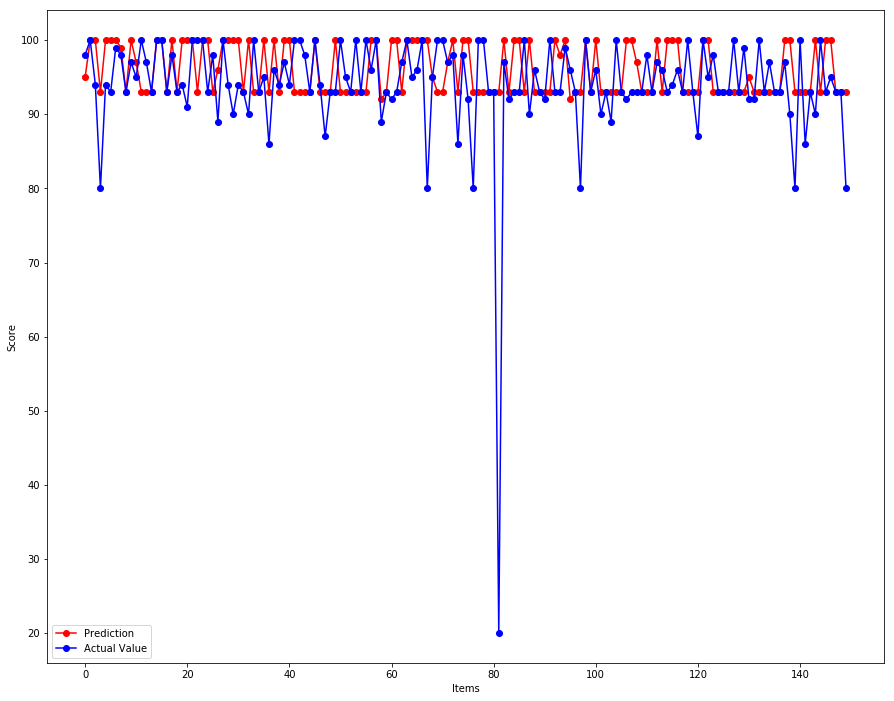

In [21]:
score_plot = plt.rcParams["figure.figsize"]
 
print("Current size:", score_plot)
 
score_plot[0] = 15
score_plot[1] = 12
plt.rcParams["figure.figsize"] = score_plot

plt.plot(y_pred[:150], '-or', label='Prediction')
plt.plot(y_test[:150], '-ob', label='Actual Value')
plt.ylabel('Score')
plt.xlabel('Items') 
plt.legend()



In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [23]:
data =  df_listing_detail["city"]
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


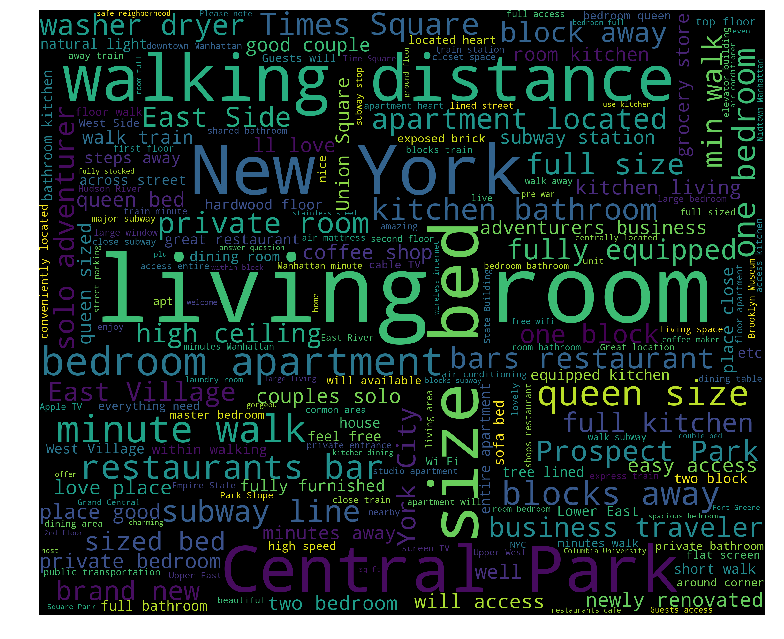

In [24]:
description =  df_listing_detail["description"]
wordcloud_draw(description,'black')

In [56]:
from gensim import corpora, models, similarities
stopwords_set = set(stopwords.words("english"))

In [57]:
df = pd.read_csv('airbnb-open-data-in-nyc/listings_detail.csv', keep_default_na=False, skip_blank_lines=False, engine='python')

In [58]:
df['amenities'].head()

0    {TV,"Wireless Internet","Air conditioning",Kit...
1    {"Wireless Internet","Air conditioning",Kitche...
2    {TV,Internet,"Wireless Internet","Air conditio...
3                                                   {}
4    {TV,"Cable TV",Internet,"Wireless Internet","A...
Name: amenities, dtype: object

In [59]:
df['cleaned_amenities'] = df['amenities'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_set)]))
df['cleaned_amenities'] = df['cleaned_amenities'].str.replace(r"[\{\},]", ' ')
df['cleaned_amenities'] = df['cleaned_amenities'].str.replace(r"[\"\',]", ' ')



df['cleaned_amenities'].head()



0     TV  Wireless Internet   Air conditioning  Kit...
1      Wireless Internet   Air conditioning  Kitche...
2     TV Internet  Wireless Internet   Air conditio...
3                                                     
4     TV  Cable TV  Internet  Wireless Internet   A...
Name: cleaned_amenities, dtype: object

In [60]:
df_NLP_recommender = df[['listing_url','name', 'summary', 'space', 'neighborhood_overview', 'notes', 'transit', 'access', 'cleaned_amenities']]
df_NLP_recommender.head()


,listing_url,name,summary,space,neighborhood_overview,notes,transit,access,cleaned_amenities
0,https://www.airbnb.com/rooms/18461891,"Bright, comfortable 1B studio near everything!",*Looking to fill these specific dates: June 24...,Very well illuminated space includes comfortab...,There are Michelin-rated restaurants in the ar...,,"Astoria is a safe and quaint neighborhood, and...",IMPORTANT: This space is not suitable for chil...,TV Wireless Internet Air conditioning Kit...
1,https://www.airbnb.com/rooms/20702398,Quiet house on City Island,1 private bedroom and bathroom available for o...,,This neighborhood is dope! Lot's of seafood re...,No loud parties or hard drugs There is wifi bu...,walk! The island is only 1.5 miles long. Publi...,"kitchen, laundry, living room, back yard",Wireless Internet Air conditioning Kitche...
2,https://www.airbnb.com/rooms/6627449,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,"We are close to fishing, boating, biking, hors...",City Island is a unique and a hidden gem of Ne...,There is off street parking in the apartment c...,We are (2) blocks from the BX29 bus which you ...,The entire apartment is available as I am only...,TV Internet Wireless Internet Air conditio...
3,https://www.airbnb.com/rooms/19949243,Stay aboard a sailboat,stay aboard a sailboat,,,,,,
4,https://www.airbnb.com/rooms/1886820,Quaint City Island Community.,Quiet island boating town on Long Island Soun...,"Master bed with queen bed, full bath and offi...",Small New England type town in the middle of ...,,Parking available in driveway. Bus stop aroun...,2 story 1800 sq ft house all to yourselves.,TV Cable TV Internet Wireless Internet A...


In [61]:
df_NLP_recommender['summary'] = df_NLP_recommender['summary'].map(lambda x: re.sub('[^a-zA-Z1-9!?.]', ' ', x))
df_NLP_recommender['name'] = df_NLP_recommender['name'].map(lambda x: re.sub('[^a-zA-Z1-9!?.]', ' ', x))
df_NLP_recommender['space'] = df_NLP_recommender['space'].map(lambda x: re.sub('[^a-zA-Z1-9!?.]', ' ', x))
df_NLP_recommender['name'] = df_NLP_recommender['name'].map(lambda x: re.sub('[^a-zA-Z1-9!?.]', ' ', x))
df_NLP_recommender['neighborhood_overview'] = df_NLP_recommender['neighborhood_overview'].map(lambda x: re.sub('[^a-zA-Z1-9!?.]', ' ', x))
df_NLP_recommender['notes'] = df_NLP_recommender['notes'].map(lambda x: re.sub('[^a-zA-Z1-9!?.]', ' ', x))
df_NLP_recommender['transit'] = df_NLP_recommender['transit'].map(lambda x: re.sub('[^a-zA-Z1-9!?.]', ' ', x))
df_NLP_recommender['access'] = df_NLP_recommender['access'].map(lambda x: re.sub('[^a-zA-Z1-9!?.]', ' ', x))
df_NLP_recommender['cleaned_amenities'] = df_NLP_recommender['cleaned_amenities'].map(lambda x: re.sub('[^a-zA-Z1-9!?.]', ' ', x))



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [62]:
df_NLP_recommender.head()

,listing_url,name,summary,space,neighborhood_overview,notes,transit,access,cleaned_amenities
0,https://www.airbnb.com/rooms/18461891,Bright comfortable 1B studio near everything!,Looking to fill these specific dates June 24...,Very well illuminated space includes comfortab...,There are Michelin rated restaurants in the ar...,,Astoria is a safe and quaint neighborhood and...,IMPORTANT This space is not suitable for chil...,TV Wireless Internet Air conditioning Kit...
1,https://www.airbnb.com/rooms/20702398,Quiet house on City Island,1 private bedroom and bathroom available for o...,,This neighborhood is dope! Lot s of seafood re...,No loud parties or hard drugs There is wifi bu...,walk! The island is only 1.5 miles long. Publi...,kitchen laundry living room back yard,Wireless Internet Air conditioning Kitche...
2,https://www.airbnb.com/rooms/6627449,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,We are close to fishing boating biking hors...,City Island is a unique and a hidden gem of Ne...,There is off street parking in the apartment c...,We are 2 blocks from the BX29 bus which you ...,The entire apartment is available as I am only...,TV Internet Wireless Internet Air conditio...
3,https://www.airbnb.com/rooms/19949243,Stay aboard a sailboat,stay aboard a sailboat,,,,,,
4,https://www.airbnb.com/rooms/1886820,Quaint City Island Community.,Quiet island boating town on Long Island Soun...,Master bed with queen bed full bath and offi...,Small New England type town in the middle of ...,,Parking available in driveway. Bus stop aroun...,2 story 18 sq ft house all to yourselves.,TV Cable TV Internet Wireless Internet A...


In [64]:
df_NLP_recommender['summary'][0]

' Looking to fill these specific dates  June 24   June 28  Cozy 1 Bedroom 1 Bathroom studio apartment on the top floor of a prewar building  conveniently located 2.5 blocks from your choice of 2 N W stations  just a 2  minute ride to Manhattan. Cafes  restaurants  wine shops  grocery and a CVS nearby. Laundromat around the corner. The beautiful riverside Astoria Park is only a 15 minute walk from the building.'

In [65]:
df_NLP_recommender.set_index('listing_url', inplace = True)

In [66]:
df_NLP_recommender.head()

,name,summary,space,neighborhood_overview,notes,transit,access,cleaned_amenities
listing_url,,,,,,,,
https://www.airbnb.com/rooms/18461891,Bright comfortable 1B studio near everything!,Looking to fill these specific dates June 24...,Very well illuminated space includes comfortab...,There are Michelin rated restaurants in the ar...,,Astoria is a safe and quaint neighborhood and...,IMPORTANT This space is not suitable for chil...,TV Wireless Internet Air conditioning Kit...
https://www.airbnb.com/rooms/20702398,Quiet house on City Island,1 private bedroom and bathroom available for o...,,This neighborhood is dope! Lot s of seafood re...,No loud parties or hard drugs There is wifi bu...,walk! The island is only 1.5 miles long. Publi...,kitchen laundry living room back yard,Wireless Internet Air conditioning Kitche...
https://www.airbnb.com/rooms/6627449,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,We are close to fishing boating biking hors...,City Island is a unique and a hidden gem of Ne...,There is off street parking in the apartment c...,We are 2 blocks from the BX29 bus which you ...,The entire apartment is available as I am only...,TV Internet Wireless Internet Air conditio...
https://www.airbnb.com/rooms/19949243,Stay aboard a sailboat,stay aboard a sailboat,,,,,,
https://www.airbnb.com/rooms/1886820,Quaint City Island Community.,Quiet island boating town on Long Island Soun...,Master bed with queen bed full bath and offi...,Small New England type town in the middle of ...,,Parking available in driveway. Bus stop aroun...,2 story 18 sq ft house all to yourselves.,TV Cable TV Internet Wireless Internet A...


In [77]:
df_NLP_recommender['combined_columns'] = ''
columns = df_NLP_recommender.columns
for index, row in df_NLP_recommender.iterrows():
    words = ''
    for col in columns:
       
            words = words + row[col]+ ' '
    row['combined_columns'] = words
    


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
df_NLP_recommender['combined_columns'].head()


listing_url
https://www.airbnb.com/rooms/18461891    Bright  comfortable 1B studio near everything!...
https://www.airbnb.com/rooms/20702398    Quiet house on City Island 1 private bedroom a...
https://www.airbnb.com/rooms/6627449     Large 1 BDRM in Great location This ground flo...
https://www.airbnb.com/rooms/19949243    Stay aboard  a sailboat stay aboard a sailboat...
https://www.airbnb.com/rooms/1886820     Quaint City Island Community.  Quiet island  b...
Name: combined_columns, dtype: object

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile
from sklearn.metrics.pairwise import cosine_similarity

In [87]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=6, stop_words='english')

In [88]:
recommender_matrix = vectorizer.fit_transform(df_NLP_recommender['combined_columns'])

In [89]:
index = pd.Series(df_NLP_recommender.index)

In [90]:
index[:5]

0    https://www.airbnb.com/rooms/18461891
1    https://www.airbnb.com/rooms/20702398
2     https://www.airbnb.com/rooms/6627449
3    https://www.airbnb.com/rooms/19949243
4     https://www.airbnb.com/rooms/1886820
Name: listing_url, dtype: object

In [92]:
cosine_sim = cosine_similarity(recommender_matrix, recommender_matrix)
cosine_sim

array([[1.        , 0.07408573, 0.07584416, ..., 0.04444082, 0.04580741,
        0.10021574],
       [0.07408573, 1.        , 0.29333207, ..., 0.16096497, 0.07645959,
        0.09463926],
       [0.07584416, 0.29333207, 1.        , ..., 0.11696616, 0.06001352,
        0.12008924],
       ...,
       [0.04444082, 0.16096497, 0.11696616, ..., 1.        , 0.05456787,
        0.13089648],
       [0.04580741, 0.07645959, 0.06001352, ..., 0.05456787, 1.        ,
        0.05628674],
       [0.10021574, 0.09463926, 0.12008924, ..., 0.13089648, 0.05628674,
        1.        ]])

In [93]:
cosine_sim.shape

(44317, 44317)

In [97]:
def predict_NLP(link, cosine_sim = cosine_sim):
    
    recommended_listings = []
    num = index[index == link].index[0]
    score = pd.Series(cosine_sim[num]).sort_values(ascending = False)
    top = list(score.iloc[1:11].index)
    for i in top:
        recommended_listings.append(list(df_NLP_recommender.index)[i])
        
    return recommended_listings

In [98]:
predict_NLP("https://www.airbnb.com/rooms/18461891")

['https://www.airbnb.com/rooms/11162977',
 'https://www.airbnb.com/rooms/17382781',
 'https://www.airbnb.com/rooms/14251832',
 'https://www.airbnb.com/rooms/17828444',
 'https://www.airbnb.com/rooms/10357730',
 'https://www.airbnb.com/rooms/19309654',
 'https://www.airbnb.com/rooms/16180024',
 'https://www.airbnb.com/rooms/13169181',
 'https://www.airbnb.com/rooms/13127582',
 'https://www.airbnb.com/rooms/6644669']